In [1]:
import seaborn as sns
import pickle
import numpy as np
from umap import UMAP

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
EMBEDDINGS_PATH = "../../data/tweets_eleicoes/eventos/bolsonaro_live/bolsolive_processado_sentence-transformers-paraphrase-multilingual-MiniLM-L12-v2.pkl"
CLUSTERS_PATH = "/home/kenzosaki/mestrado/data/tweets_eleicoes/eventos/bolsonaro_live/bolso_split_clusters.pkl"

# Carregando embeddings e clusters

In [4]:
print(f"- Loading embeddings from {EMBEDDINGS_PATH}")
print(f"- Loading clusters from {CLUSTERS_PATH}")

- Loading embeddings from ../../data/tweets_eleicoes/eventos/bolsonaro_live/bolsolive_processado_sentence-transformers-paraphrase-multilingual-MiniLM-L12-v2.pkl
- Loading clusters from /home/kenzosaki/mestrado/data/tweets_eleicoes/eventos/bolsonaro_live/bolso_split_clusters.pkl


In [5]:
with open(EMBEDDINGS_PATH, "rb") as f:
    text_vectors = pickle.load(f)

with open(CLUSTERS_PATH, "rb") as f:
    clusters = pickle.load(f)

In [6]:
print(f"- Embeddings shape: {text_vectors.shape}")
print(f"- Clusters shape: {clusters.shape}")

- Embeddings shape: (4771, 384)
- Clusters shape: (4771,)


# Analisando quantidades de exemplos por cluster

In [7]:
unique, counts = np.unique(clusters, return_counts=True)
sorted_idxs = np.argsort(counts)[::-1]
print(f"- {len(unique) - 1} identified clusters.")
for i in sorted_idxs:
    print(f"\t- {unique[i]:2d}: {counts[i]}")

- 9 identified clusters.
	- -1: 1491
	-  9: 1040
	-  6: 790
	-  2: 389
	-  3: 387
	-  7: 234
	- 10: 184
	-  0: 119
	-  8: 72
	-  1: 65


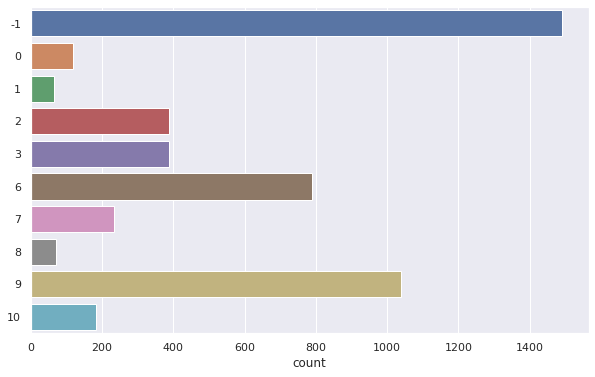

In [8]:
sns.countplot(y=clusters)

In [9]:
# Removendo outliers
no_outliers = clusters != -1
text_vectors = text_vectors[no_outliers]
clusters = clusters[no_outliers]

In [10]:
print(f"- Without outliers: {text_vectors.shape}, {clusters.shape}")

- Without outliers: (3280, 384), (3280,)


# Preparando visualizações

In [11]:
from umap import UMAP 
from hdbscan import validity

In [12]:
# Utilizando representações 2D para visualizar os clusters
umap_reducer = UMAP(n_components=2, n_neighbors=50, min_dist=0.0, metric='cosine', transform_seed=1234, random_state=1234, low_memory=True)

In [13]:
reduced_embeddings = umap_reducer.fit_transform(text_vectors)

# Visualizando clusters

In [14]:
import matplotlib.pyplot as plt

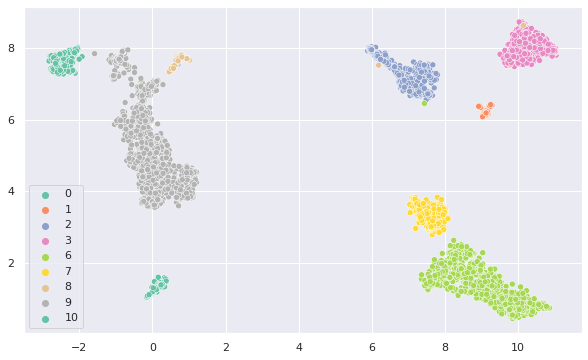

In [15]:
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="Set2")
plt.savefig("imgs/umap_clusters.png", bbox_inches="tight")